## 라이브러리 임포트

In [2]:
# Library import - data preprocessing 
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder

In [3]:
## Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [4]:
# torch
import torch 

In [5]:
# 평가지표
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, mean_squared_error
from scipy.stats import spearmanr

In [6]:
# visulazation
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [7]:
# font manager
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [8]:
# tqdm
from tqdm import tqdm

In [9]:
# kaggle hub
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [10]:
## GPU check
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("사용중인 디바이스:", device)

사용중인 디바이스: cuda


In [11]:
print("CUDA 사용 가능?", torch.cuda.is_available())
if torch.cuda.is_available():
    print("사용 중인 GPU:", torch.cuda.get_device_name(0))
else:
    print("GPU를 사용할 수 없습니다.")

CUDA 사용 가능? True
사용 중인 GPU: NVIDIA GeForce MX450


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
import re

In [14]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

In [18]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 682.7 kB/s eta 0:00:19
     ---------------------------------------- 0.1/12.8 MB 1.2 MB/s eta 0:00:12
     ---------------------------------------- 0.1/12.8 MB 1.0 MB/s eta 0:00:13
      --------------------------------------- 0.2/12.8 MB 1.1 MB/s eta 0:00:12
      --------------------------------------- 0.2/12.8 MB 1.2 MB/s eta 0:00:11
      --------------------------------------- 0.3/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.4/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.4/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.5/12.8 MB 1.1 MB/s eta 0:00:11
     - -------------------------------------- 0.5/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.6/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.6/12.8 MB 


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import spacy
nlp = spacy.load("en_core_web_sm")

## Data Load

In [22]:
pip install kagglehub[pandas-datasets]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
path = kagglehub.dataset_download("datasnaek/youtube-new")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\wonny\.cache\kagglehub\datasets\datasnaek\youtube-new\versions\115


In [24]:
# Load USvideo Dataset
df = pd.read_csv(os.path.join(path, "USvideos.csv"))

In [25]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

## Data preprocessing

### function definition

In [27]:
def preprocess_title(text):
    if not isinstance(text, str):
        return ""

    # 1. 소문자 변환
    text = text.lower()

    # 2. 특수문자, 숫자 제거
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. spaCy 형태소 분석
    doc = nlp(text)

    # 4. 명사/형용사 + 불용어 제거 + 원형 복원
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha
        and not token.is_stop
        and token.pos_ in ['NOUN', 'ADJ', 'PROPN', 'VERB', 'NUM', 'ADV', 'INTJ']
    ]

    return ' '.join(tokens)


In [28]:
def preprocess_description(text):
    if not isinstance(text, str):
        return ""

    # 1. 소문자 변환
    text = text.lower()

    # 2. 특수문자, 숫자 제거 (알파벳만 남김)
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. spaCy 분석
    doc = nlp(text)

    # 4. 불용어 제거 + 명사/형용사 + 원형 복원
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha
        and not token.is_stop
        and token.pos_ in ['NOUN', 'ADJ', 'PROPN', 'VERB', 'NUM', 'ADV', 'INTJ']
    ]

    return ' '.join(tokens)

In [66]:
def count_pos(text):
    if not isinstance(text, str):
        return {'NOUN': 0, 'PROPN': 0, 'ADJ': 0, 'VERB': 0, 'INTJ': 0, 'NUM': 0}

    doc = nlp(text.lower())
    pos_counts = {'NOUN': 0, 'PROPN': 0, 'ADJ': 0, 'VERB': 0, 'INTJ': 0, 'NUM': 0}

    for token in doc:
        if token.pos_ in pos_counts:
            pos_counts[token.pos_] += 1

    return pos_counts

In [29]:
def extract_common_words(row):
    title_words = set(row['cleaned_title'].split())
    desc_words = set(row['cleand_desc'].split())
    common = title_words & desc_words  # 교집합
    return ' '.join(common) if common else ''

### category mapping

In [30]:
# Category mapping 
# json file
json_path = os.path.join(path, "US_category_id.json")

# Json load
with open(json_path, 'r', encoding = 'utf-8') as f:
    category_json = json.load(f)

category_mapping = {
    int(item['id']): item['snippet']['title']
    for item in category_json['items']}

In [31]:
# 매핑 딕셔너리 확인
print(category_mapping)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [32]:
df['category_name'] = df['category_id'].map(category_mapping)

In [33]:
df['category_name']

0          People & Blogs
1           Entertainment
2                  Comedy
3           Entertainment
4           Entertainment
               ...       
40944      Pets & Animals
40945      People & Blogs
40946       Entertainment
40947    Film & Animation
40948              Gaming
Name: category_name, Length: 40949, dtype: object

In [34]:
# 카테고리별 데이터 샘플 수 확인 
category_counts = df['category_name'].value_counts().sort_values(ascending = True)

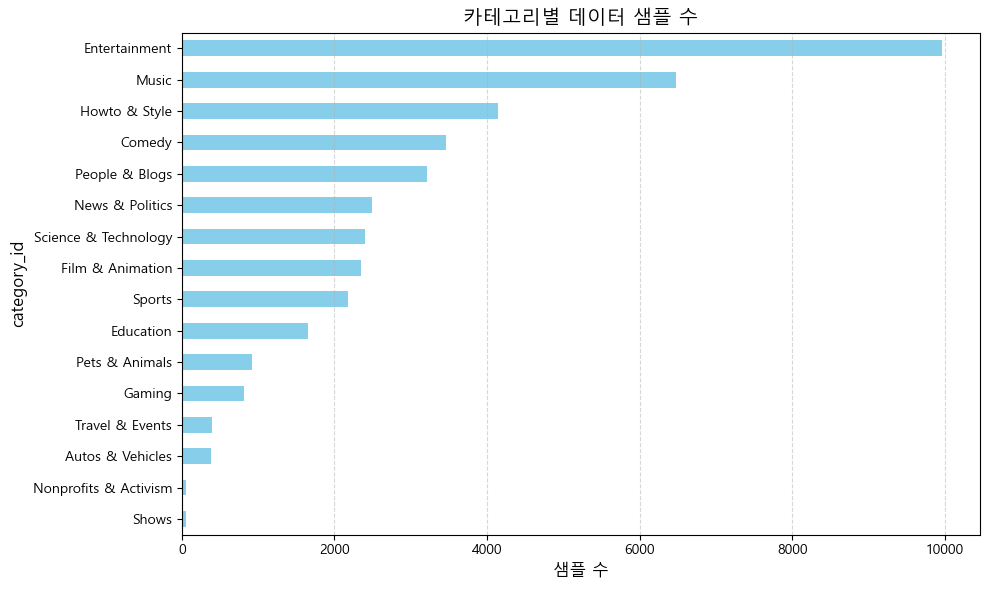

In [35]:
plt.figure(figsize=(10,6))
category_counts.plot(kind='barh', color='skyblue')

plt.title("카테고리별 데이터 샘플 수", fontsize=14)
plt.xlabel("샘플 수", fontsize=12)
plt.ylabel("category_id", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### category filtering

In [36]:
# category filtering
cat_name = 'Gaming'
game_data = df[df['category_name'] == cat_name].copy()

In [37]:
game_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
131,lsfzA7sWlOM,17.14.11,L.A. Noire - Nintendo Switch Trailer,Nintendo,20,2017-11-09T19:59:48.000Z,"nintendo|""play""|""play nintendo""|""game""|""gamepl...",154872,7683,164,1734,https://i.ytimg.com/vi/lsfzA7sWlOM/default.jpg,False,False,False,Amid the post-war boom of Hollywood's Golden A...,Gaming
392,lsfzA7sWlOM,17.15.11,L.A. Noire - Nintendo Switch Trailer,Nintendo,20,2017-11-09T19:59:48.000Z,"nintendo|""play""|""play nintendo""|""game""|""gamepl...",161231,7803,169,1479,https://i.ytimg.com/vi/lsfzA7sWlOM/default.jpg,False,False,False,Amid the post-war boom of Hollywood's Golden A...,Gaming
405,EEIP1YpFXrE,17.16.11,Our First Date,iHasCupquake,20,2017-11-15T20:00:00.000Z,"first date|""animation""|""animated""|""short""|""sho...",224426,17784,225,2762,https://i.ytimg.com/vi/EEIP1YpFXrE/default.jpg,False,False,False,Here's an animation short of our First Date! W...,Gaming
619,EEIP1YpFXrE,17.17.11,Our First Date,iHasCupquake,20,2017-11-15T20:00:00.000Z,"first date|""animation""|""animated""|""short""|""sho...",463992,25840,509,3708,https://i.ytimg.com/vi/EEIP1YpFXrE/default.jpg,False,False,False,Here's an animation short of our First Date! W...,Gaming
652,hXcoq5XDwyA,17.17.11,Playing CUPHEAD with MatPat!,Butch Hartman,20,2017-11-15T22:02:34.000Z,"game theory|""film theory""|""cuphead""|""don't dea...",55460,3871,96,428,https://i.ytimg.com/vi/hXcoq5XDwyA/default.jpg,False,False,False,"After my appearance on GTLive, MatPat (Game Th...",Gaming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40874,9jRtpMKLsts,18.14.06,"Pokémon: Let's Go, Pikachu! and Pokémon: Let's...",The Official Pokémon YouTube channel,20,2018-05-30T01:22:17.000Z,"Pokémon|""Pokemon""|""Pokémon Let's Go""|""Pokémon ...",9992803,230507,24911,60041,https://i.ytimg.com/vi/9jRtpMKLsts/default.jpg,False,False,False,Return to the Kanto region and experience a cl...,Gaming
40911,tn0hCTyj2Kc,18.14.06,The Sims 4 Seasons: Official Reveal Trailer,The Sims,20,2018-05-24T16:59:24.000Z,"The Sims 4|""The Sims 4 Trailer""|""Sims 4 Traile...",1749832,77408,1392,18242,https://i.ytimg.com/vi/tn0hCTyj2Kc/default.jpg,False,False,False,Add weather to your Sims’ lives to tell new st...,Gaming
40919,vDyYMcjf500,18.14.06,The History of Fortnite Battle Royale - Did Yo...,DidYouKnowGaming?,20,2018-05-24T19:00:24.000Z,"fortnite|""fortnite pc""|""fortnite battle royale...",324219,7840,1333,1257,https://i.ytimg.com/vi/vDyYMcjf500/default.jpg,False,False,False,Thanks to Skillshare for sponsoring this video...,Gaming
40936,Xr2rgT9uEnA,18.14.06,LIE DETECTOR TEST WITH MY GIRLFRIEND!,miniminter,20,2018-05-20T18:00:02.000Z,"miniminter|""mm7games""|""simon""|""random""|""lie de...",3229540,109945,3062,6774,https://i.ytimg.com/vi/Xr2rgT9uEnA/default.jpg,False,False,False,Talia: https://www.youtube.com/user/nataliahad...,Gaming


In [38]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 131 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                817 non-null    object
 1   trending_date           817 non-null    object
 2   title                   817 non-null    object
 3   channel_title           817 non-null    object
 4   category_id             817 non-null    int64 
 5   publish_time            817 non-null    object
 6   tags                    817 non-null    object
 7   views                   817 non-null    int64 
 8   likes                   817 non-null    int64 
 9   dislikes                817 non-null    int64 
 10  comment_count           817 non-null    int64 
 11  thumbnail_link          817 non-null    object
 12  comments_disabled       817 non-null    bool  
 13  ratings_disabled        817 non-null    bool  
 14  video_error_or_removed  817 non-null    bool  
 15  descrip

In [39]:
game_df = game_data[['title', 'views', 'likes', 'description']]
game_df.head(5)

,title,views,likes,description
131,L.A. Noire - Nintendo Switch Trailer,154872,7683,Amid the post-war boom of Hollywood's Golden A...
392,L.A. Noire - Nintendo Switch Trailer,161231,7803,Amid the post-war boom of Hollywood's Golden A...
405,Our First Date,224426,17784,Here's an animation short of our First Date! W...
619,Our First Date,463992,25840,Here's an animation short of our First Date! W...
652,Playing CUPHEAD with MatPat!,55460,3871,"After my appearance on GTLive, MatPat (Game Th..."


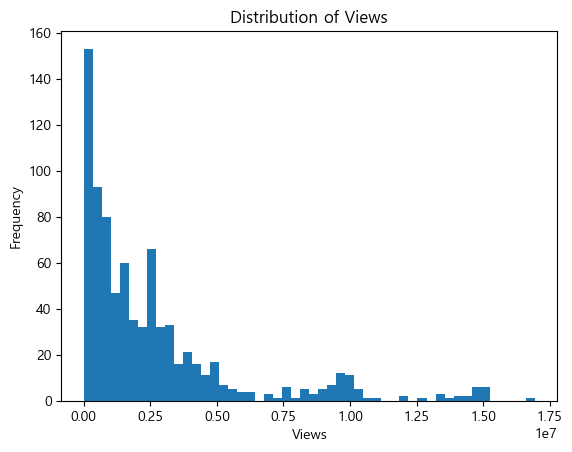

In [40]:
# target 분포 확인 
plt.hist(game_df['views'], bins=50)
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.title('Distribution of Views')
plt.show()

C:\Users\wonny\AppData\Local\Temp\ipykernel_19820\1121708721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df['log_views'] = np.log1p(game_df['views'])


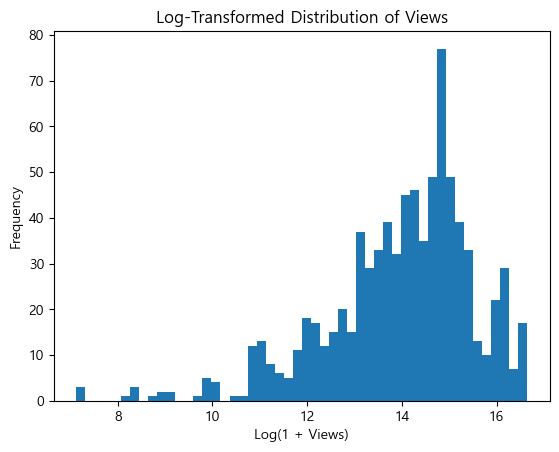

In [41]:
# target log scaling 
game_df['log_views'] = np.log1p(game_df['views'])

plt.hist(game_df['log_views'], bins=50)
plt.xlabel('Log(1 + Views)')
plt.ylabel('Frequency')
plt.title('Log-Transformed Distribution of Views')
plt.show()

In [42]:
# log_views 열을 표준화
scaler = StandardScaler()
game_df['log_views_scaled'] = scaler.fit_transform(game_df[['log_views']])

C:\Users\wonny\AppData\Local\Temp\ipykernel_19820\3972654438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df['log_views_scaled'] = scaler.fit_transform(game_df[['log_views']])


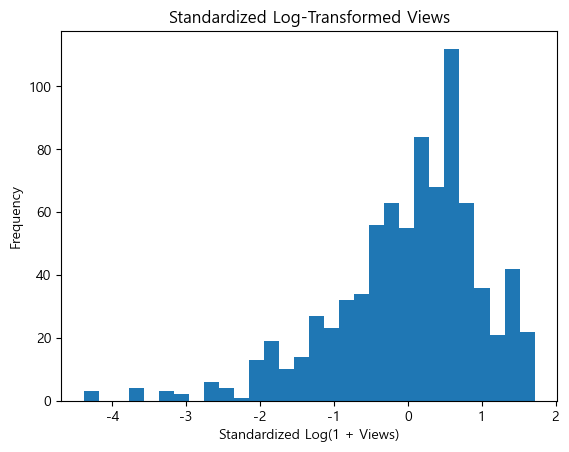

In [43]:
plt.hist(game_df['log_views_scaled'], bins=30)
plt.title("Standardized Log-Transformed Views")
plt.xlabel("Standardized Log(1 + Views)")
plt.ylabel("Frequency")
plt.show()

### 제목 전처리 

In [44]:
game_df['cleaned_title'] = game_df['title'].apply(preprocess_title)

C:\Users\wonny\AppData\Local\Temp\ipykernel_19820\3908585635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df['cleaned_title'] = game_df['title'].apply(preprocess_title)


In [45]:
game_df['cleand_desc'] = game_df['description'].apply(preprocess_description)

C:\Users\wonny\AppData\Local\Temp\ipykernel_19820\2892365416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df['cleand_desc'] = game_df['description'].apply(preprocess_description)


In [46]:
game_df.head(5)

,title,views,likes,description,log_views,log_views_scaled,cleaned_title,cleand_desc
131,L.A. Noire - Nintendo Switch Trailer,154872,7683,Amid the post-war boom of Hollywood's Golden A...,11.950361,-1.291706,la noire nintendo switch trailer,postwar boom hollywood golden age cole phelp l...
392,L.A. Noire - Nintendo Switch Trailer,161231,7803,Amid the post-war boom of Hollywood's Golden A...,11.990600,-1.265922,la noire nintendo switch trailer,postwar boom hollywood golden age cole phelp l...
405,Our First Date,224426,17784,Here's an animation short of our First Date! W...,12.321306,-1.054013,date,here animation short date excited hear think l...
619,Our First Date,463992,25840,Here's an animation short of our First Date! W...,13.047625,-0.588606,date,here animation short date excited hear think l...
652,Playing CUPHEAD with MatPat!,55460,3871,"After my appearance on GTLive, MatPat (Game Th...",10.923435,-1.949735,play cuphead matpat,appearance gtlive matpat game theory play cuph...


### 품사별 count

In [146]:
# 각 제목에서 품사별 개수 추출
pos_df = game_df['title'].apply(count_pos).apply(pd.Series)

# 기존 df와 합치기
game_df = pd.concat([game_df, pos_df], axis=1)

In [147]:
game_df

,title,views,likes,description,log_views,log_views_scaled,cleaned_title,cleand_desc,NOUN,PROPN,ADJ,VERB,INTJ,NUM
131,L.A. Noire - Nintendo Switch Trailer,154872,7683,Amid the post-war boom of Hollywood's Golden A...,11.950361,-1.291706,la noire nintendo switch trailer,postwar boom hollywood golden age cole phelp l...,2,4,0,0,0,0
392,L.A. Noire - Nintendo Switch Trailer,161231,7803,Amid the post-war boom of Hollywood's Golden A...,11.990600,-1.265922,la noire nintendo switch trailer,postwar boom hollywood golden age cole phelp l...,2,4,0,0,0,0
405,Our First Date,224426,17784,Here's an animation short of our First Date! W...,12.321306,-1.054013,date,here animation short date excited hear think l...,1,0,1,0,0,0
619,Our First Date,463992,25840,Here's an animation short of our First Date! W...,13.047625,-0.588606,date,here animation short date excited hear think l...,1,0,1,0,0,0
652,Playing CUPHEAD with MatPat!,55460,3871,"After my appearance on GTLive, MatPat (Game Th...",10.923435,-1.949735,play cuphead matpat,appearance gtlive matpat game theory play cuph...,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40874,"Pokémon: Let's Go, Pikachu! and Pokémon: Let's...",9992803,230507,Return to the Kanto region and experience a cl...,16.117376,1.378417,pokmon let pikachu pokmon let eevee trailer,return kanto region experience classic pokmon ...,2,3,0,4,0,0
40911,The Sims 4 Seasons: Official Reveal Trailer,1749832,77408,Add weather to your Sims’ lives to tell new st...,14.375031,0.261964,sims season official reveal trailer,add weather sim live tell new story enjoy seas...,3,0,1,1,0,1
40919,The History of Fortnite Battle Royale - Did Yo...,324219,7840,Thanks to Skillshare for sponsoring this video...,12.689178,-0.818290,history fortnite battle royale know game feat ...,thank skillshare sponsor video people sign lin...,4,1,1,2,0,0
40936,LIE DETECTOR TEST WITH MY GIRLFRIEND!,3229540,109945,Talia: https://www.youtube.com/user/nataliahad...,14.987851,0.654644,lie detector test girlfriend,talia httpswwwyoutubecomusernataliahaddockjosh...,4,0,0,0,0,0


### 조회수 상위 영상에서 자주 등장하는 단어 확인

--------------------------------------------------------------------------------------------------------

조회수가 높은 영상들에서 자주 등장하는 단어 확인하기 (tf-idf)

In [107]:
# 조회수 기준 상위 영상 vs 하위 영상 비교 
top_df = game_df[game_df['views'] >= game_df['views'].quantile(0.90)].copy()
bottom_df = game_df[game_df['views'] >= game_df['views'].quantile(0.10)].copy()

In [108]:
## tf-idf
# 벡터화 객체 생성
vectorizer = TfidfVectorizer(
    stop_words='english',      # 영어 불용어 제거
    max_features=1000,         # 상위 5000개의 단어만 사용
    ngram_range=(1, 2)         # unigram + bigram 사용
)

In [112]:
# 벡터화 수행
X_tfidf = vectorizer.fit_transform(top_df['cleaned_title'])

# 단어 목록 추출
tfidf_words = vectorizer.get_feature_names_out()

In [113]:
# 단어별 TF-IDF 점수 합계 구하기
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# 상위 30개 단어 보기
print(tfidf_df.head(30))

                  word     score
6                clash  8.922829
49              royale  8.905378
8         clash royale  8.905378
56             trailer  7.655398
33            official  7.255476
0                black  7.053768
13                duty  7.053768
27         multiplayer  7.053768
28  multiplayer reveal  7.053768
1             black op  7.053768
34       official duty  7.053768
14          duty black  7.053768
37      op multiplayer  7.053768
36                  op  7.053768
46              reveal  7.053768
47      reveal trailer  7.053768
25                meet  6.659609
44              rascal  6.659609
45          rascal new  6.659609
29                 new  6.659609
51         royale meet  6.659609
26         meet rascal  6.659609
30            new card  6.659609
2                 card  6.659609
20                 let  5.598334
43          pokmon let  5.598334
42              pokmon  5.598334
3                 clan  5.423804
59                 war  5.264746
50        

-----------------------------------------------------------------------------------------------------------

전체 데이터에서 출현 빈도가 높은 단어들 확인하기 (countvectorizer) 

In [115]:
#CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_counts = vectorizer.fit_transform(top_df['cleaned_title']) 

# 단어별 빈도 계산
word_counts = X_counts.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

# 정리
count_df = pd.DataFrame({'word': words, 'count': word_counts})
count_df = count_df.sort_values('count', ascending=False)

In [116]:
count_df

,word,count
27,trailer,38
3,clash,35
24,royale,33
16,official,28
22,reveal,25
13,multiplayer,25
17,op,25
0,black,25
6,duty,25
20,pokmon,24


----------------------------------------------------------------------------------------------------------

In [126]:
keywords = [
        'rank', 'op', 'patch', 'update', 'buff', 'nerf', 'new', 'epic',
        'trick', 'tips', 'glitch', 'record', 'kill', 'highlight', 'champion',
        'trailer', 'royale', 'official', 'reveal', 'black', 'multiplayer']

pattern = r'\b(?:' + '|'.join(keywords) + r')\b'

game_df['has_rank_related'] = game_df['title'].str.lower().str.contains(pattern)

In [127]:
game_df['has_rank_related'].sum()

311

### 조회수 상위 / 하위 영상 비교 

In [130]:
# 벡터화 수행
X_tfidf = vectorizer.fit_transform(top_df['cleaned_title'])

# 단어 목록 추출
tfidf_words = vectorizer.get_feature_names_out()

# 단어별 TF-IDF 점수 합계 구하기
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# 상위 20개 단어 보기
print(tfidf_df.head(100))

           word  score
27      trailer     38
3         clash     35
24       royale     33
16     official     28
22       reveal     25
13  multiplayer     25
17           op     25
0         black     25
6          duty     25
20       pokmon     24
10          let     24
12         meet     21
14          new     21
1          card     21
21       rascal     21
2          clan     14
18      pikachu     12
29          war     12
7         eevee     12
11         look      6
9          labo      6
15     nintendo      6
19         play      3
23      reynold      3
5      deadpool      3
25         ryan      3
8          hall      2
26         town      2
28       update      2
4     cyberpunk      1


In [132]:
# 벡터화 수행
X_tfidf = vectorizer.fit_transform(bottom_df['cleaned_title'])

# 단어 목록 추출
tfidf_words = vectorizer.get_feature_names_out()

# 단어별 TF-IDF 점수 합계 구하기
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# 상위 20개 단어 보기
print(tfidf_df.head(100))

         word  score
250   trailer    170
175  official     86
100      game     82
210    royale     78
172  nintendo     71
..        ...    ...
70        dlc     13
136    league     13
74      dream     13
105       god     12
223      slip     12

[100 rows x 2 columns]


### clustering

In [133]:
## 클러스터링 
titles = game_df['cleaned_title']

#TF-IDF 벡터화
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=1000,
    ngram_range=(1, 2)
)
X_tfidf = vectorizer.fit_transform(titles)

#단어 벡터 추출 (문서-단어 행렬 전치 → 단어 x 문서 행렬)
X_words = X_tfidf.T

#KMeans 클러스터링
n_clusters = 5  # 군집 수는 실험하면서 조정 가능
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
word_labels = kmeans.fit_predict(X_words)

#클러스터 결과 정리
words = vectorizer.get_feature_names_out()
cluster_df = pd.DataFrame({'word': words, 'cluster': word_labels})

#클러스터별 단어 리스트 확인
cluster_groups = cluster_df.groupby('cluster')['word'].apply(list).reset_index(name='words')

#클러스터별 단어 출력
for idx, row in cluster_groups.iterrows():
    print(f"📌 Cluster {row['cluster']}:")
    print(", ".join(row['words']))
    print("-" * 50)

📌 Cluster 0:
day, ghost, ghost pepper, pepper, pepper day
--------------------------------------------------
📌 Cluster 1:
alto, alto odyssey, february, february nd, launch, launch february, nd, nd preorder, odyssey, odyssey trailer, preorder, trailer, trailer launch
--------------------------------------------------
📌 Cluster 2:
action, action trailer, ad, adult, adult okay, adventure, adventure dynamic, adventure sneak, alien, alien rideplanet, amazing, amazing creature, american, american vs, animate, animate ghost, anniversary, anniversary dev, announce, announce trailer, announcement, announcement teaser, announcement trailer, anthem, anthem official, aonuma, aonuma mr, archive, armoured, armoured truck, assassin, assassin creed, auto, auto boundary, award, award death, awards, awards gameplay, ball, ball fighterz, ballad, ballad trailer, barcelona, barcelona day, battle, battle royale, battlefield, battlefield official, battlefront, battlefront mod, battlefront new, battleground, 

In [136]:
#제목, 단어 클러스터, 조회수 데이터 준비
titles = game_df['cleaned_title'].astype(str).tolist()
views = game_df['views'].tolist()
word_cluster_map = dict(zip(cluster_df['word'], cluster_df['cluster']))  # 단어 → 클러스터번호

#제목별 포함된 클러스터 목록 만들기
title_clusters = []

for title in titles:
    found_clusters = set()
    for word in word_cluster_map:
        if word in title:
            found_clusters.add(word_cluster_map[word])
    title_clusters.append(list(found_clusters))

#각 클러스터 번호 기준으로 해당되는 조회수 모으기
cluster_to_views = {}

for clusters, view in zip(title_clusters, views):
    for c in clusters:
        if c not in cluster_to_views:
            cluster_to_views[c] = []
        cluster_to_views[c].append(view)

#평균 조회수 계산
cluster_avg_views = {
    c: np.mean(vlist) for c, vlist in cluster_to_views.items() if len(vlist) > 0
}

#결과 출력
for c, avg in sorted(cluster_avg_views.items()):
    print(f"📊 Cluster {c} - 평균 조회수: {round(avg):,}회")

📊 Cluster 0 - 평균 조회수: 1,226,391회
📊 Cluster 1 - 평균 조회수: 2,939,331회
📊 Cluster 2 - 평균 조회수: 2,642,560회
📊 Cluster 3 - 평균 조회수: 3,921,480회
📊 Cluster 4 - 평균 조회수: 2,022,725회


### 조회수 구간별 제목 길이 및 단어 수

In [137]:
# 단어 수 계산
game_df['title_cnt'] = game_df['cleaned_title'].apply(lambda x: len(x.split()))

# 확인
game_df.head(5)

,title,views,likes,description,log_views,log_views_scaled,cleaned_title,cleand_desc,NOUN,PROPN,ADJ,VERB,INTJ,NUM,has_rank_related,title_cnt
131,L.A. Noire - Nintendo Switch Trailer,154872,7683,Amid the post-war boom of Hollywood's Golden A...,11.950361,-1.291706,la noire nintendo switch trailer,postwar boom hollywood golden age cole phelp l...,2,4,0,0,0,0,True,5
392,L.A. Noire - Nintendo Switch Trailer,161231,7803,Amid the post-war boom of Hollywood's Golden A...,11.990600,-1.265922,la noire nintendo switch trailer,postwar boom hollywood golden age cole phelp l...,2,4,0,0,0,0,True,5
405,Our First Date,224426,17784,Here's an animation short of our First Date! W...,12.321306,-1.054013,date,here animation short date excited hear think l...,1,0,1,0,0,0,False,1
619,Our First Date,463992,25840,Here's an animation short of our First Date! W...,13.047625,-0.588606,date,here animation short date excited hear think l...,1,0,1,0,0,0,False,1
652,Playing CUPHEAD with MatPat!,55460,3871,"After my appearance on GTLive, MatPat (Game Th...",10.923435,-1.949735,play cuphead matpat,appearance gtlive matpat game theory play cuph...,1,1,0,1,0,0,False,3


In [140]:
# 제목 길이 계산 
game_df['title_len'] = game_df['title'].apply(lambda x: len(x))

# 확인
game_df.head(5)

,title,views,likes,description,log_views,log_views_scaled,cleaned_title,cleand_desc,NOUN,PROPN,ADJ,VERB,INTJ,NUM,has_rank_related,title_cnt,title_len
131,L.A. Noire - Nintendo Switch Trailer,154872,7683,Amid the post-war boom of Hollywood's Golden A...,11.950361,-1.291706,la noire nintendo switch trailer,postwar boom hollywood golden age cole phelp l...,2,4,0,0,0,0,True,5,36
392,L.A. Noire - Nintendo Switch Trailer,161231,7803,Amid the post-war boom of Hollywood's Golden A...,11.990600,-1.265922,la noire nintendo switch trailer,postwar boom hollywood golden age cole phelp l...,2,4,0,0,0,0,True,5,36
405,Our First Date,224426,17784,Here's an animation short of our First Date! W...,12.321306,-1.054013,date,here animation short date excited hear think l...,1,0,1,0,0,0,False,1,14
619,Our First Date,463992,25840,Here's an animation short of our First Date! W...,13.047625,-0.588606,date,here animation short date excited hear think l...,1,0,1,0,0,0,False,1,14
652,Playing CUPHEAD with MatPat!,55460,3871,"After my appearance on GTLive, MatPat (Game Th...",10.923435,-1.949735,play cuphead matpat,appearance gtlive matpat game theory play cuph...,1,1,0,1,0,0,False,3,28


-----------------------------------------------------------------------------------------------------------

조회수 구간별로 평균값에 차이가 있는지 확인

In [141]:
# 구간 5구간으로 분할 
game_df['views_bin'] = pd.qcut(game_df['views'], q=3, labels=[1,2,3])

In [145]:
grouped = game_df.groupby('views_bin').agg({
    'title_cnt': 'mean',
    'views': 'mean',
    'title_cnt' : 'mean',
    'title_len' : 'mean'
}).reset_index()

print(grouped)

  views_bin  title_cnt         views  title_len
0         1   5.340659  3.300992e+05  47.391941
1         2   4.812500  1.630028e+06  45.411765
2         3   5.161765  5.910787e+06  46.272059


C:\Users\wonny\AppData\Local\Temp\ipykernel_22328\642284289.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = game_df.groupby('views_bin').agg({


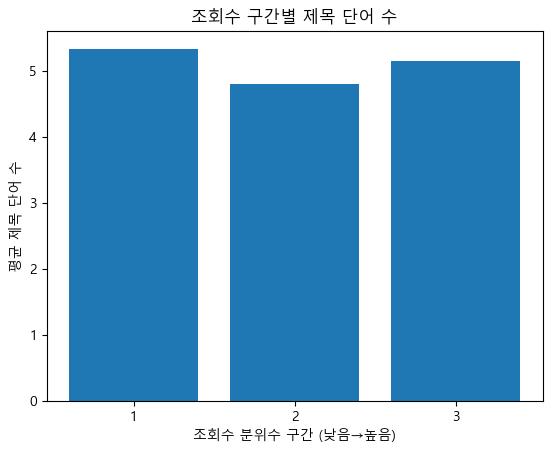

In [146]:
plt.bar(grouped['views_bin'].astype(str), grouped['title_cnt'])
plt.xlabel('조회수 분위수 구간 (낮음→높음)')
plt.ylabel('평균 제목 단어 수')
plt.title('조회수 구간별 제목 단어 수')
plt.show()

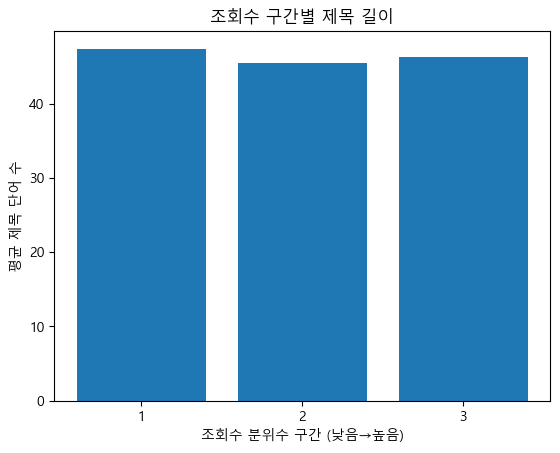

In [150]:
plt.bar(grouped['views_bin'].astype(str), grouped['title_len'])
plt.xlabel('조회수 분위수 구간 (낮음→높음)')
plt.ylabel('평균 제목 단어 수')
plt.title('조회수 구간별 제목 길이')
plt.show()

In [149]:
# 분위수 구간별로 title_cnt 분리
group1 = game_df[game_df['views_bin'] == 1]['title_cnt']
group2 = game_df[game_df['views_bin'] == 2]['title_cnt']
group3 = game_df[game_df['views_bin'] == 3]['title_cnt']

# ANOVA 테스트
f_stat, p_val = f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

F-statistic: 4.5585
P-value: 0.0107


### description과 title에 겹치는 단어 있는지 확인

In [153]:
game_df

,title,views,likes,description,log_views,log_views_scaled,cleaned_title,cleand_desc,NOUN,PROPN,ADJ,VERB,INTJ,NUM,has_rank_related,title_cnt,title_len,views_bin
131,L.A. Noire - Nintendo Switch Trailer,154872,7683,Amid the post-war boom of Hollywood's Golden A...,11.950361,-1.291706,la noire nintendo switch trailer,postwar boom hollywood golden age cole phelp l...,2,4,0,0,0,0,True,5,36,1
392,L.A. Noire - Nintendo Switch Trailer,161231,7803,Amid the post-war boom of Hollywood's Golden A...,11.990600,-1.265922,la noire nintendo switch trailer,postwar boom hollywood golden age cole phelp l...,2,4,0,0,0,0,True,5,36,1
405,Our First Date,224426,17784,Here's an animation short of our First Date! W...,12.321306,-1.054013,date,here animation short date excited hear think l...,1,0,1,0,0,0,False,1,14,1
619,Our First Date,463992,25840,Here's an animation short of our First Date! W...,13.047625,-0.588606,date,here animation short date excited hear think l...,1,0,1,0,0,0,False,1,14,1
652,Playing CUPHEAD with MatPat!,55460,3871,"After my appearance on GTLive, MatPat (Game Th...",10.923435,-1.949735,play cuphead matpat,appearance gtlive matpat game theory play cuph...,1,1,0,1,0,0,False,3,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40874,"Pokémon: Let's Go, Pikachu! and Pokémon: Let's...",9992803,230507,Return to the Kanto region and experience a cl...,16.117376,1.378417,pokmon let pikachu pokmon let eevee trailer,return kanto region experience classic pokmon ...,2,3,0,4,0,0,True,7,65,3
40911,The Sims 4 Seasons: Official Reveal Trailer,1749832,77408,Add weather to your Sims’ lives to tell new st...,14.375031,0.261964,sims season official reveal trailer,add weather sim live tell new story enjoy seas...,3,0,1,1,0,1,True,5,43,2
40919,The History of Fortnite Battle Royale - Did Yo...,324219,7840,Thanks to Skillshare for sponsoring this video...,12.689178,-0.818290,history fortnite battle royale know game feat ...,thank skillshare sponsor video people sign lin...,4,1,1,2,0,0,True,8,72,1
40936,LIE DETECTOR TEST WITH MY GIRLFRIEND!,3229540,109945,Talia: https://www.youtube.com/user/nataliahad...,14.987851,0.654644,lie detector test girlfriend,talia httpswwwyoutubecomusernataliahaddockjosh...,4,0,0,0,0,0,False,4,37,3


In [155]:
# 겹치는 단어 탐색
game_df['common_words'] = game_df.apply(extract_common_words, axis=1)

In [156]:
# 개수까지 같이 세기
game_df['n_common_words'] = game_df['common_words'].apply(lambda x: len(x.split()) if x else 0)

In [158]:
game_df['n_common_words']

131      4
392      4
405      1
619      1
652      2
        ..
40874    4
40911    0
40919    6
40936    0
40948    4
Name: n_common_words, Length: 817, dtype: int64

In [169]:
# 조회수 구간에 따라 차이가 있는지 확인 
grouped = game_df.groupby('views_bin').agg({
    'views' : 'mean',
    'n_common_words': 'mean',
    'NOUN' : 'mean',
    'PROPN' : 'mean',
    'VERB' : 'mean',
    'INTJ' : 'mean',
    'NUM' : 'mean'
}).reset_index()

print(grouped)

  views_bin         views  n_common_words      NOUN     PROPN      VERB  INTJ  \
0         1  3.300992e+05        3.032967  2.604396  1.637363  0.769231   0.0   
1         2  1.630028e+06        2.338235  2.691176  1.073529  0.779412   0.0   
2         3  5.910787e+06        2.959559  3.474265  0.591912  0.852941   0.0   

        NUM  
0  0.472527  
1  0.352941  
2  0.312500  


C:\Users\wonny\AppData\Local\Temp\ipykernel_22328\2622363220.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = game_df.groupby('views_bin').agg({


-----------------------------------------------------------------------------------------------------------

### 최종 예측

------------------------------------------------------------------------------------------------------

키워드 사전 구축

In [167]:
# 조회수가 높은 영상에 자주 등장하는 키워드 사전 구축 
keywords = [
        'rank', 'op', 'patch', 'update', 'buff', 'nerf', 'new', 'epic',
        'trick', 'tips', 'glitch', 'record', 'kill', 'highlight', 'champion',
        'trailer', 'royale', 'official', 'reveal', 'black', 'multiplayer']

hype_words = ['insane', 'crazy', 'unbelievable', 'god', '1v5', 'clutch']

특징 추출 함수 정의

In [49]:
def extract_features(row):
    features = {}

    # 원본 텍스트
    title = row['title'] if isinstance(row['title'], str) else ''
    desc = row['description'] if isinstance(row['description'], str) else ''

    # 전처리된 텍스트
    cleaned_title = preprocess_title(title)
    cleaned_desc = preprocess_description(desc)

    # 공통 단어
    title_words = set(cleaned_title.split())
    desc_words = set(cleaned_desc.split())
    common = title_words & desc_words
    features['n_common_words'] = len(common)
    features['common_words'] = ' '.join(common)

    # 제목 길이 및 단어 수 
    features['title_len'] = len(title)
    features['title_cnt'] = len(cleaned_title.split())

    # 느낌표 / 물음표 개수
    features['num_exclamations'] = title.count('!')
    features['num_questions'] = title.count('?')

    # 숫자 포함 여부 
    features['has_number'] = int(bool(re.search(r'\d', title)))
    features['starts_with_number'] = int(bool(re.match(r'^\d', title.strip())))  

    # 키워드 포함 여부 (사전 정의된 keyword 리스트 필요)
    keywords = [
        'rank', 'op', 'patch', 'update', 'buff', 'nerf', 'new', 'epic',
        'trick', 'tips', 'glitch', 'record', 'kill', 'highlight', 'champion',
        'trailer', 'royale', 'official', 'reveal', 'black', 'multiplayer'
    ]
    features['has_keyword'] = int(any(word in cleaned_title for word in keywords))

    # 대문자 비율 30% 이상 여부
    features['is_caps_heavy'] = int(sum(1 for c in title if c.isupper()) > len(title) * 0.3)

    # 품사 카운트
    pos_counts = count_pos(title)
    features.update(pos_counts)

    return features


점수 계산 함수 정의

In [128]:
def compute_rule_score(features):
    score = 0

    # 1. 제목 길이: 짧을수록 가산점
    score += -0.03 * features['title_len']

    # 2. 단어 수: 많을수록 클릭 유도 가능성 있음
    score -= 0.3 * features['title_cnt']

    # 3. 느낌표 / 물음표 개수
    score += 0.3 * features['num_exclamations']
    score += 0.3 * features['num_questions']

    # 4. 숫자 포함 여부
    score += 0.5 * features['has_number']

    # 5. 숫자로 시작
    score -= 0.1 * features['starts_with_number']

    # 6. 키워드 포함 여부
    score += 0.8 * features['has_keyword']

    # 7. 대문자 비율이 높은 경우
    score -= 0.3 * features['is_caps_heavy']

    # 8. 품사 기반: 명사·동사 많으면 내용 풍부, 고유명사 많으면 오히려 일반성↓
    score += 0.5 * features.get('NOUN', 0)
    score += 0.5 * features.get('VERB', 0)
    score += -0.1 * features.get('PROPN', 0)  # 고유명사 많으면 가중치 낮춤

    # 9. 공통 단어 개수 (title과 desc 간 overlap)
    score += 0.3 * features.get('n_common_words', 0)

    return score

실제 적용할 데이터에서 사용할 칼럼만 불러오기

In [130]:
game = game_data[['title', 'views', 'description']].copy()

타겟 스케일링

In [131]:
# target scaling
game['log_views'] = np.log1p(game['views'])

scaler = StandardScaler()
game['scaled_views'] = scaler.fit_transform(game[['log_views']])

In [132]:
game = game.drop(columns = ['views', 'log_views'])
game

,title,description,scaled_views
131,L.A. Noire - Nintendo Switch Trailer,Amid the post-war boom of Hollywood's Golden A...,-1.291706
392,L.A. Noire - Nintendo Switch Trailer,Amid the post-war boom of Hollywood's Golden A...,-1.265922
405,Our First Date,Here's an animation short of our First Date! W...,-1.054013
619,Our First Date,Here's an animation short of our First Date! W...,-0.588606
652,Playing CUPHEAD with MatPat!,"After my appearance on GTLive, MatPat (Game Th...",-1.949735
...,...,...,...
40874,"Pokémon: Let's Go, Pikachu! and Pokémon: Let's...",Return to the Kanto region and experience a cl...,1.378417
40911,The Sims 4 Seasons: Official Reveal Trailer,Add weather to your Sims’ lives to tell new st...,0.261964
40919,The History of Fortnite Battle Royale - Did Yo...,Thanks to Skillshare for sponsoring this video...,-0.818290
40936,LIE DETECTOR TEST WITH MY GIRLFRIEND!,Talia: https://www.youtube.com/user/nataliahad...,0.654644


In [133]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 131 to 40948
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         817 non-null    object 
 1   description   803 non-null    object 
 2   scaled_views  817 non-null    float64
dtypes: float64(1), object(2)
memory usage: 25.5+ KB


함수 적용

In [134]:
game['features'] = game.apply(extract_features, axis=1)

In [135]:
game['rule_score'] = game['features'].apply(compute_rule_score)

### (예측 1) 지수함수로 예측

In [136]:
def score_to_views(score, base=1e5):
    return int(base * np.exp(score / 3))

In [137]:
game['predicted_views'] = game['rule_score'].apply(score_to_views)

In [138]:
game[['title', 'scaled_views', 'rule_score', 'predicted_views']].sort_values(by='scaled_views', ascending=False).head()

,title,scaled_views,rule_score,predicted_views
34706,Clash Royale: CLAN WARS IS HERE!,1.716454,1.84,184657
38326,Clash Royale: Meet the Rascals! (New Card!),1.638720,1.71,176826
38127,Clash Royale: Meet the Rascals! (New Card!),1.638378,1.71,176826
37917,Clash Royale: Meet the Rascals! (New Card!),1.637270,1.71,176826
37713,Clash Royale: Meet the Rascals! (New Card!),1.636549,1.71,176826


In [139]:
# 예측값을 log-scaling + standardization한 것과 맞추려면:
pred_scaled = np.log1p(game['predicted_views'])
pred_scaled = (pred_scaled - pred_scaled.mean()) / pred_scaled.std()

# 실제값
true_scaled = game['scaled_views']

In [140]:
rmse = mean_squared_error(game['scaled_views'], pred_scaled, squared=False)
r2 = r2_score(true_scaled, pred_scaled)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

📉 RMSE: 1.1068
📈 R²: -0.2250


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### (예측 2) Linear Regression

In [143]:
# X, y 정의
X = game[['rule_score']]  # 독립 변수: rule 기반 점수
y = game['scaled_views']  # 종속 변수: log + 표준화된 조회수

# 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 평가 지표 출력
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.9220
R²: 0.1499


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


가중치 수정을 위한 회귀계수 확인

In [148]:
# 피처 추출
features_df = game.apply(extract_features, axis=1, result_type='expand')

# 독립변수(X), 종속변수(y)
X = features_df.drop(columns = 'common_words', errors = 'ignore')  
y = game['scaled_views']

# 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 성능 평가
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

# 결과 출력
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))

# 계수 확인
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print("\n Feature Importance (계수):")
print(coefficients)

RMSE: 0.8528
R²: 0.2727

 Feature Importance (계수):
starts_with_number   -1.195872
has_keyword           0.448128
ADJ                   0.434662
title_cnt            -0.354184
num_exclamations      0.331347
VERB                  0.233345
NOUN                  0.211376
NUM                   0.133383
PROPN                 0.105712
is_caps_heavy         0.068243
n_common_words        0.061508
has_number           -0.046178
num_questions         0.029993
title_len            -0.000353
INTJ                  0.000000
dtype: float64


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-----------------------------------------------------------------------------------------------------

점수 가중치 수정 후 다시 예측

In [155]:
def compute_rule_score_modified(features):
    score = 0

    # 1. 제목 길이: 짧을수록 가산점
    score -= 0.03 * features['title_len']

    # 2. 단어 수: 적을수록 클릭 유도 가능성 있음
    score -= 0.3 * features['title_cnt']

    # 3. 느낌표 / 물음표 개수
    score += 0.3 * features['num_exclamations']
    score += 0.3 * features['num_questions']

    # 4. 숫자 포함 여부
    score -= 0.7 * features['has_number']

    # 5. 숫자로 시작
    score -= 0.8 * features['starts_with_number']

    # 6. 키워드 포함 여부
    score += 0.8 * features['has_keyword']

    # 7. 대문자 비율이 높은 경우
    score -= 0.3 * features['is_caps_heavy']

    # 8. 품사 기반: 명사·동사 많으면 내용 풍부, 고유명사 많으면 오히려 일반성↓
    score += 0.7 * features.get('NOUN', 0)
    score += 0.7 * features.get('VERB', 0)
    score += 0.1 * features.get('PROPN', 0)  # 고유명사 많으면 가중치 낮춤

    # 9. 공통 단어 개수 (title과 desc 간 overlap)
    score += 0.3 * features.get('n_common_words', 0)

    return score

In [156]:
game['rule_score_modified'] = game['features'].apply(compute_rule_score_modified)

In [157]:
# X, y 정의
X = game[['rule_score_modified']]  # 독립 변수: rule 기반 점수
y = game['scaled_views']  # 종속 변수: log + 표준화된 조회수

# 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 평가 지표 출력
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.9549
R²: 0.0882


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
